In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('A3/train.csv', index_col='ArticleId')
X = df['Text']
df['Category'].replace(['tech', 'entertainment'], [0,1], inplace=True)
Y = df['Category']

df_test = pd.read_csv('A3/test.csv', index_col='ArticleId')
X_test = df_test['Text']
df_test['Category'].replace(['tech', 'entertainment'], [0,1], inplace=True)
Y_test = df_test['Category']

temp_complete_test = pd.concat([X, X_test])


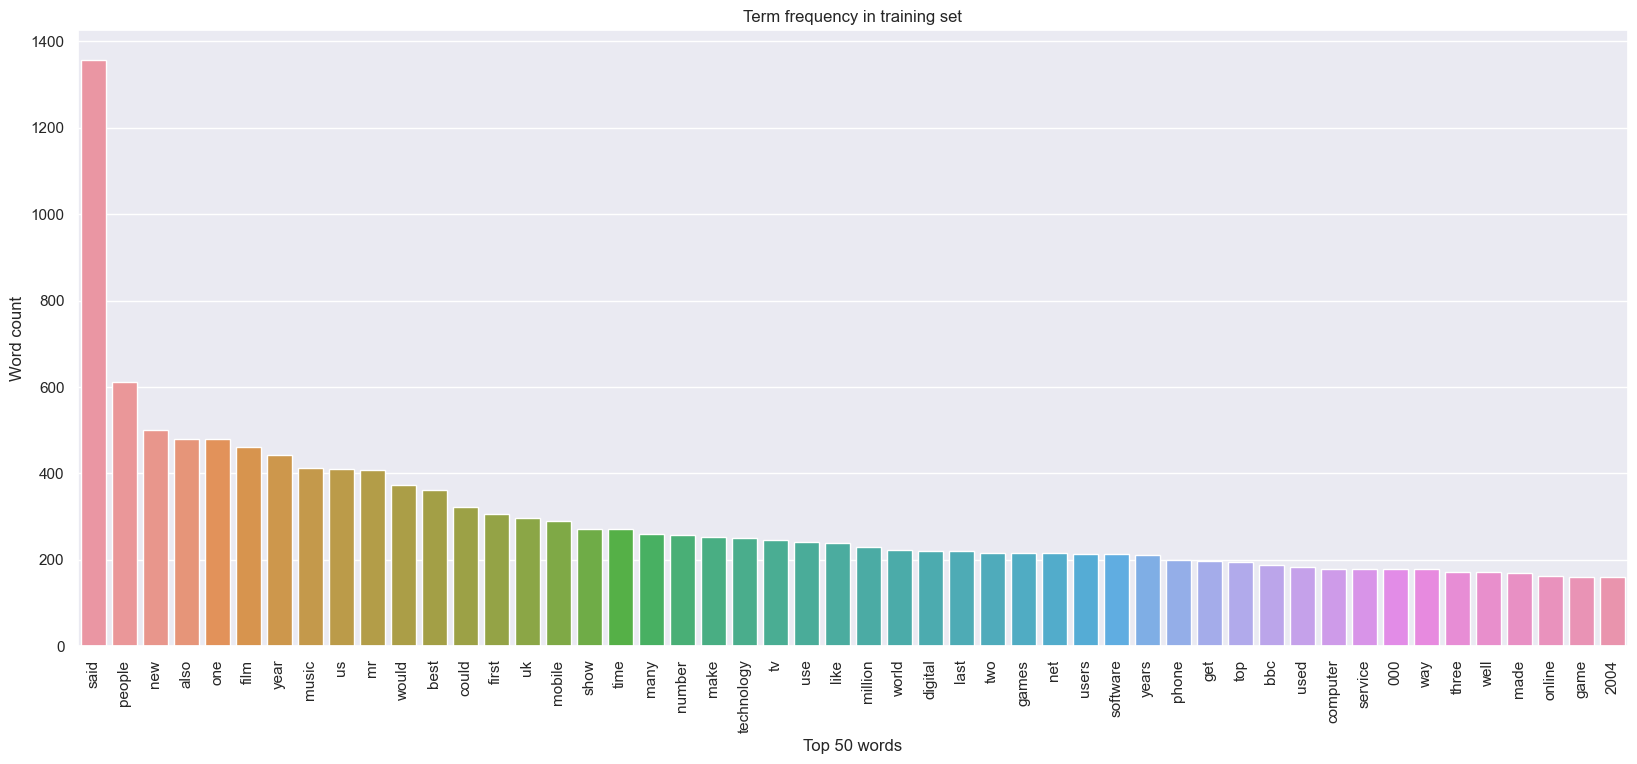

In [2]:
# Frequency count for dataset
vectorizer = CountVectorizer()
vectorizer.fit(temp_complete_test)
# Encode document
vector = vectorizer.transform(temp_complete_test)
prep_X_count = pd.DataFrame(vector.toarray(), columns=sorted(vectorizer.vocabulary_), index=temp_complete_test.index)
#print(prep_X_count)

prep_X_train_count = prep_X_count[:428]
prep_X_test_count = prep_X_count[428:]

train_sum = prep_X_train_count.sum().sort_values(ascending=False)
test_sum = prep_X_test_count.sum().sort_values(ascending=False)

train_top_50 = train_sum.head(50)
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(20,8)})
plot = sns.barplot(x=train_top_50.index, y=train_top_50.values)
plot.set_xlabel('Top 50 words')
plot.set_ylabel('Word count')
plot.set_title('Term frequency in training set')
plt.xticks(rotation = 90)
plt.show()

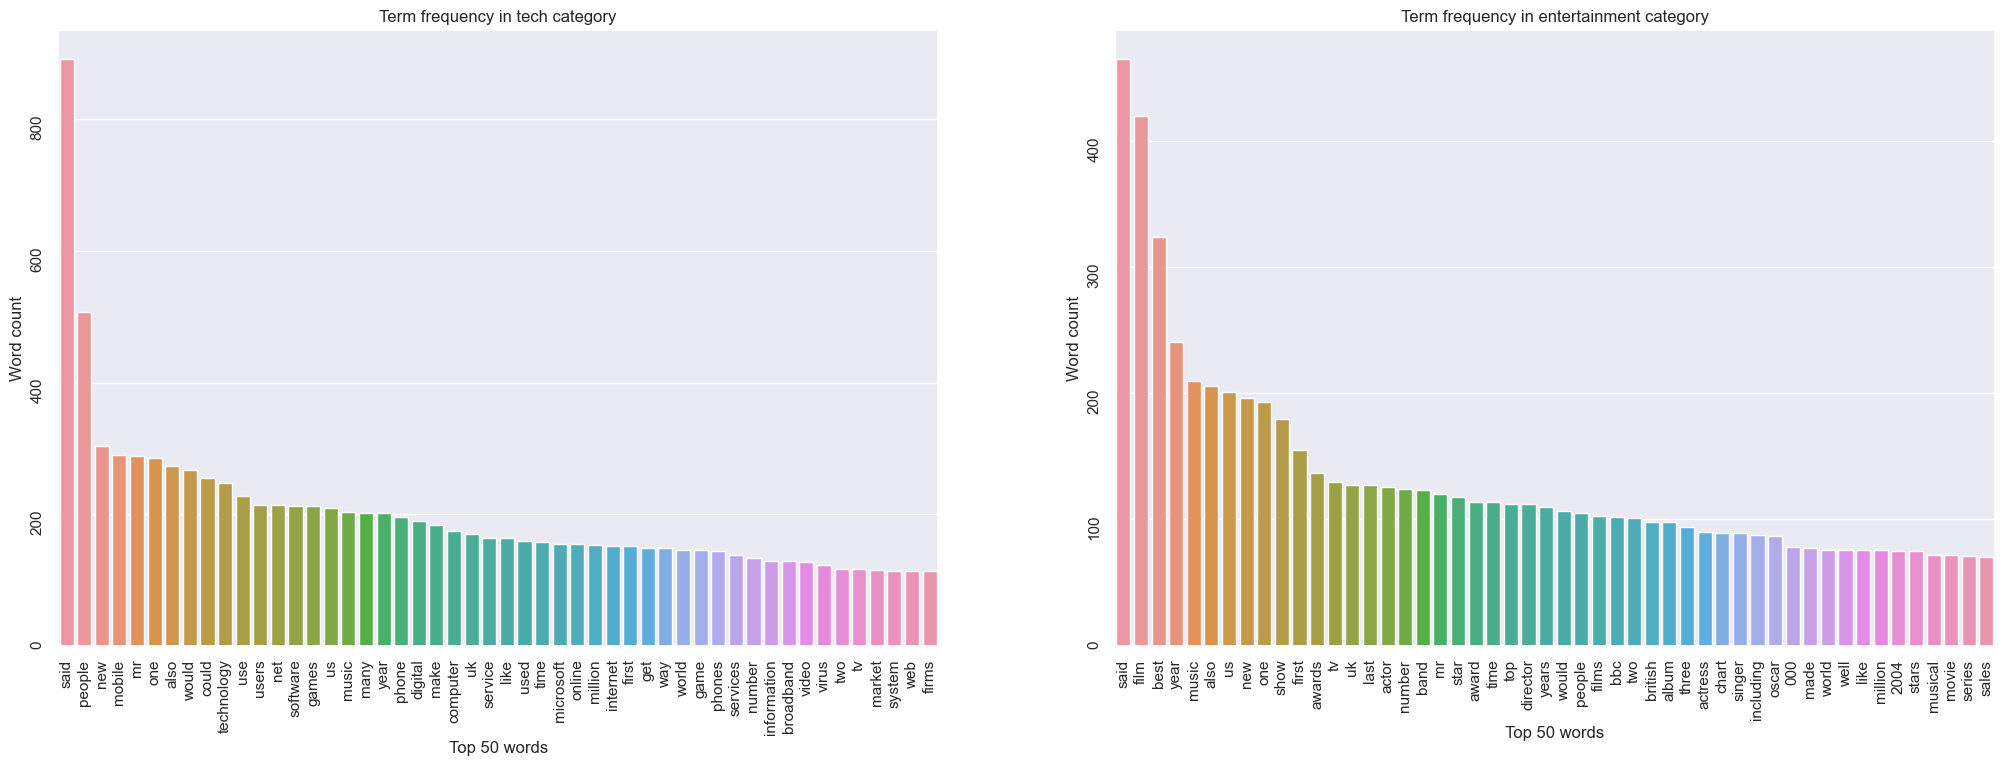

In [3]:
train_label_group = Y.groupby(Y)
train_tech, train_entertain = train_label_group.get_group(0).index, train_label_group.get_group(1).index

train_tech_sum = prep_X_count.loc[train_tech].sum().sort_values(ascending=False)
train_entertain_sum = prep_X_count.loc[train_entertain].sum().sort_values(ascending=False)

train_top_50_tech = train_tech_sum.head(50)
train_top_50_entertain = train_entertain_sum.head(50)

fig, ax = plt.subplots(ncols=2, figsize=(25, 8))
ax[0] = sns.barplot(x=train_top_50_tech.index, y=train_top_50_tech.values, ax=ax[0])
ax[0].set_xlabel('Top 50 words')
ax[0].set_ylabel('Word count')
ax[0].set_title('Term frequency in tech category')
ax[0].tick_params(labelrotation=90)

ax[1] = sns.barplot(x=train_top_50_entertain.index, y=train_top_50_entertain.values, ax=ax[1])
ax[1].set_xlabel('Top 50 words')
ax[1].set_ylabel('Word count')
ax[1].set_title('Term frequency in entertainment category')
ax[1].tick_params(labelrotation=90)
plt.show()

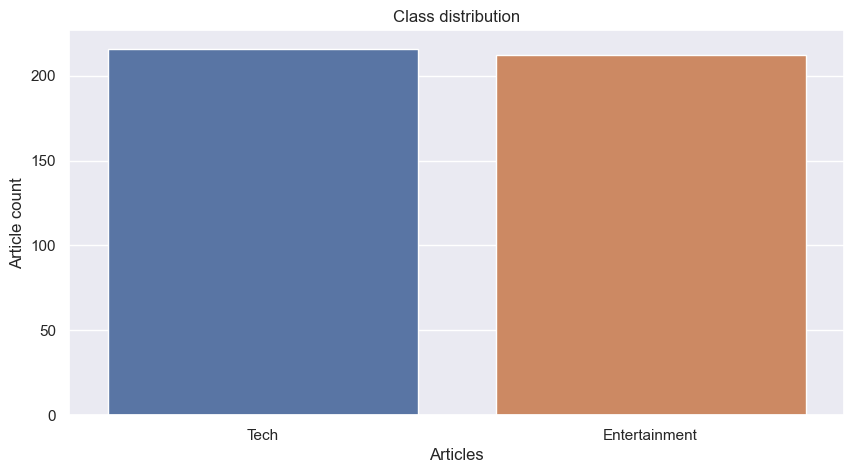

In [4]:
sns.set(rc = {'figure.figsize':(10,5)})
plot = sns.barplot(x=['Tech', 'Entertainment'], y=[train_tech.size, train_entertain.size])
plot.set_xlabel('Articles')
plot.set_ylabel('Article count')
plot.set_title('Class distribution')
plt.show()

In [5]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

# encode document
vector = vectorizer.transform(X_test)
prep_X_test = pd.DataFrame(vector.toarray(), columns=sorted(vectorizer.vocabulary_), index=X_test.index)

vector = vectorizer.transform(X)
prep_X_train = pd.DataFrame(vector.toarray(), columns=sorted(vectorizer.vocabulary_), index=X.index)
print(prep_X_test.shape)
print(prep_X_train.shape)

(106, 13518)
(428, 13518)


# Neural Network

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import warnings

warnings.filterwarnings('ignore')

np.random.seed(1)

init_weigths = np.random.uniform(0., 0.1, 14927)
hid_units = [5,20,40]
results = []

for hid_unit in hid_units:
    clf = MLPClassifier(hidden_layer_sizes=(hid_unit,), solver='sgd', learning_rate_init=0.01, max_iter=100)
    clf.coefs_ = init_weigths

    clf.fit(prep_X_train,Y)

    preds = clf.predict(prep_X_test)
    score = clf.score(prep_X_test, Y_test)

    loss = log_loss(Y_test, preds)
    results.append([hid_unit, loss, score])

print(results)

[[5, 0.6800689318701351, 0.9811320754716981], [20, 0.6800689318701351, 0.9811320754716981], [40, 0.6800689318701351, 0.9811320754716981]]


[]

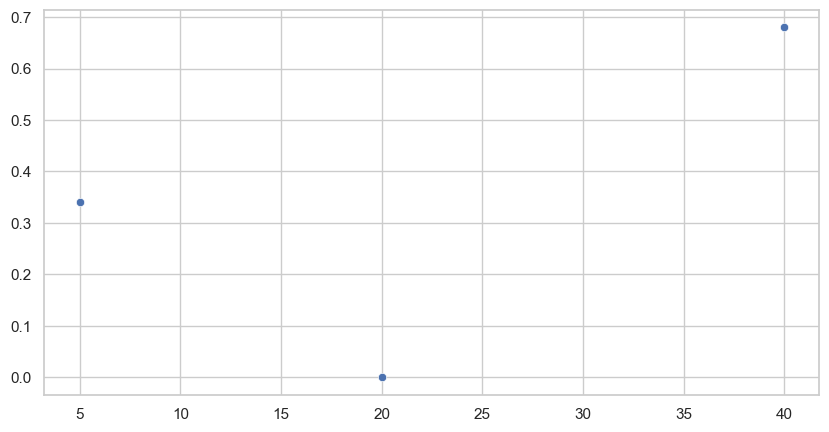

In [8]:
sns.set_style('whitegrid')
results = np.array(results).T
plot = sns.scatterplot(x=results[0], y=results[1])
plt.plot()

# Task 2b) kNN

Training accuracy for kNN (Euclidean): 1.0
Test accuracy for kNN (Euclidean): 0.9811320754716981
Training accuracy for kNN (Manhattan): 1.0
Test accuracy for kNN (Manhattan): 0.9716981132075472


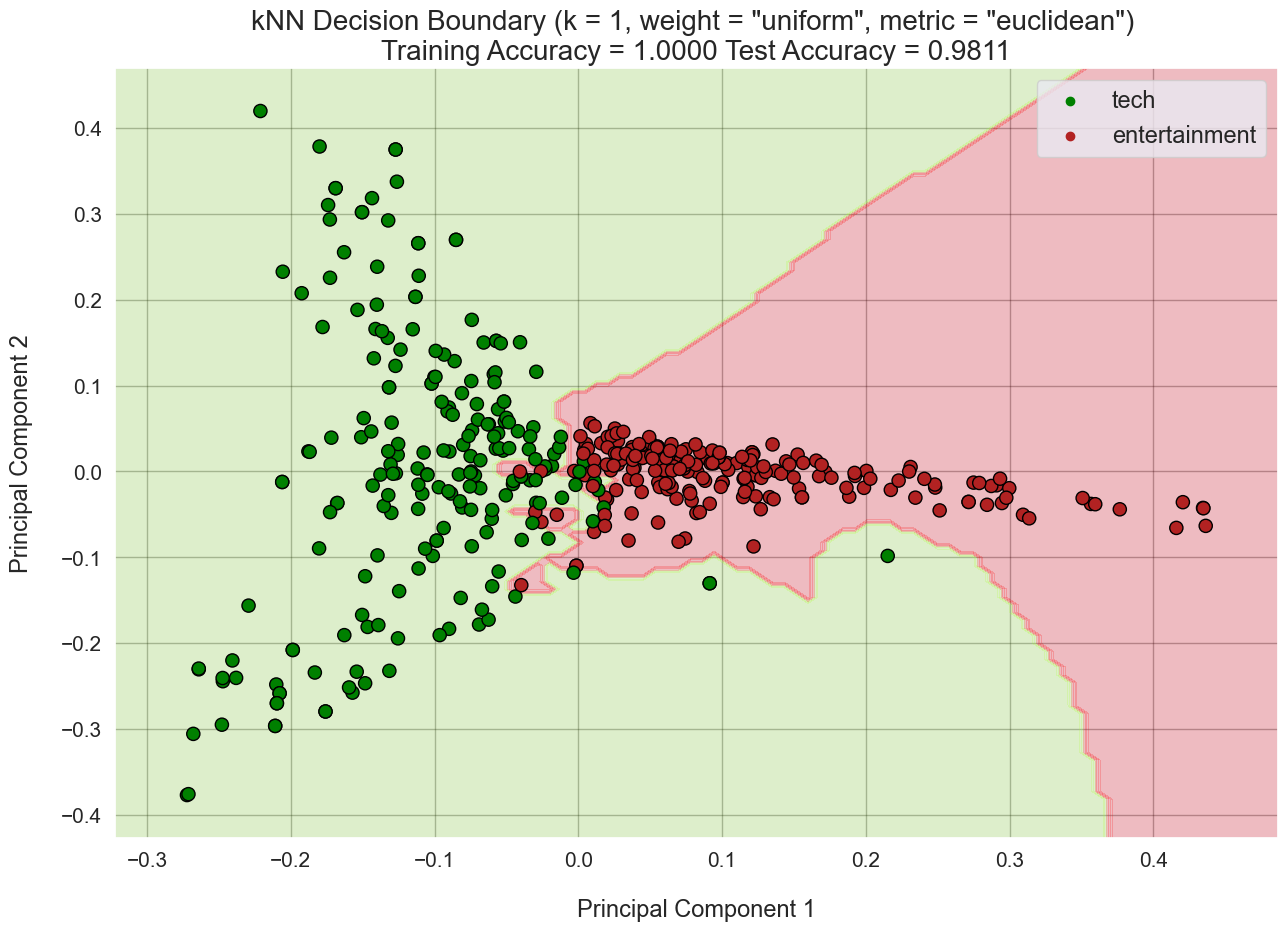

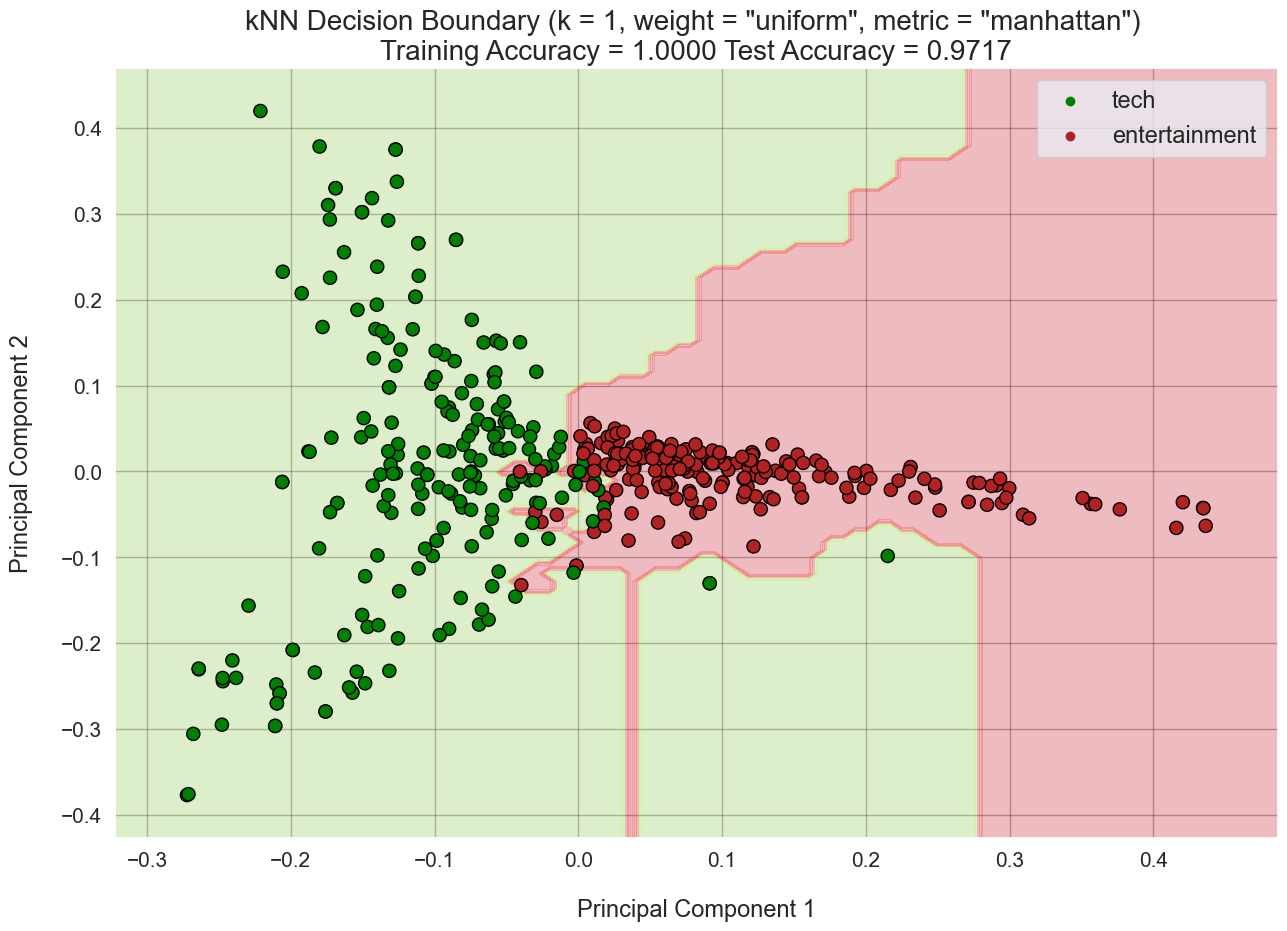

Training accuracy for kNN (Euclidean): 0.9672897196261683
Test accuracy for kNN (Euclidean): 0.9716981132075472
Training accuracy for kNN (Manhattan): 0.9719626168224299
Test accuracy for kNN (Manhattan): 0.9622641509433962


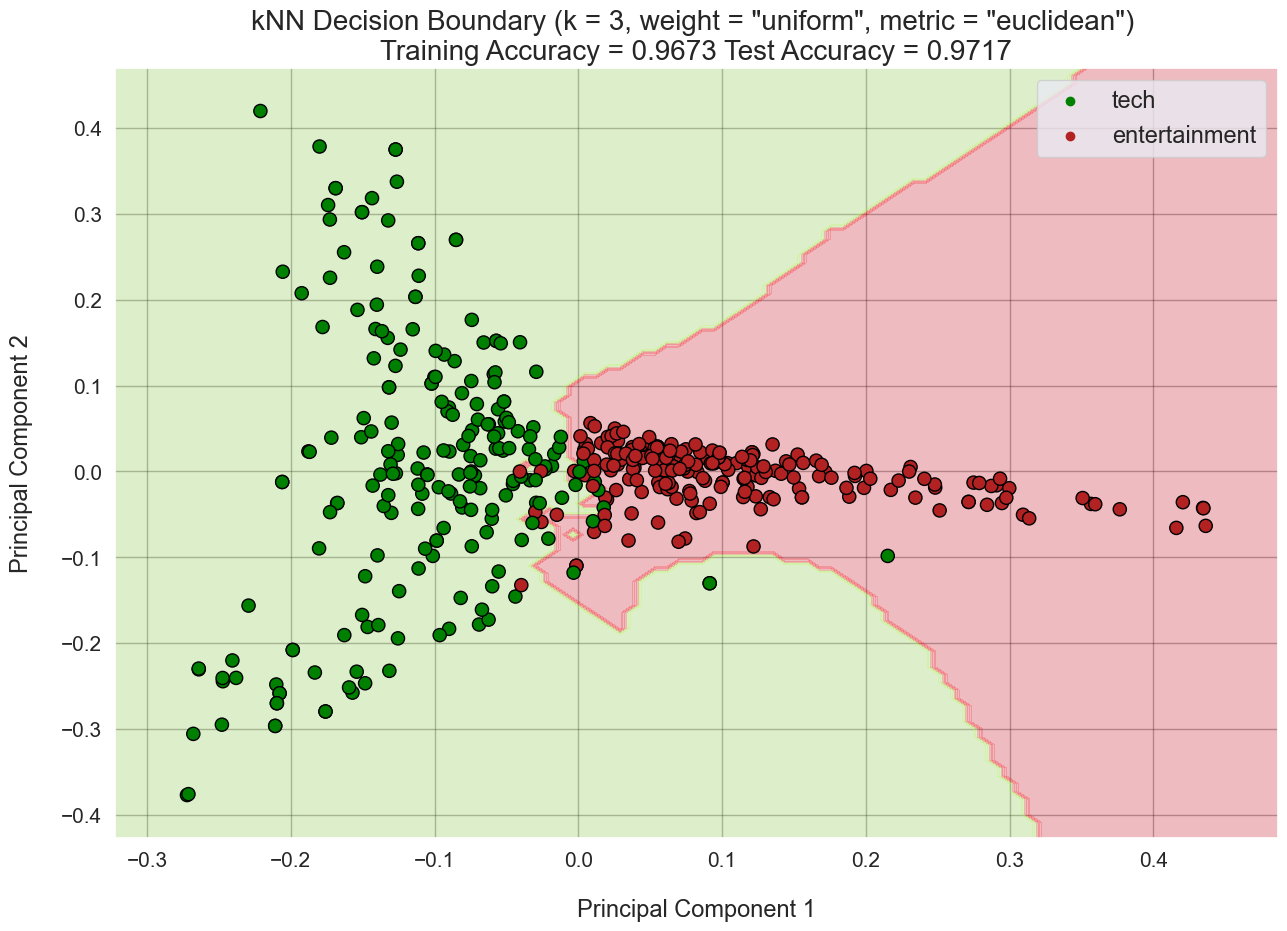

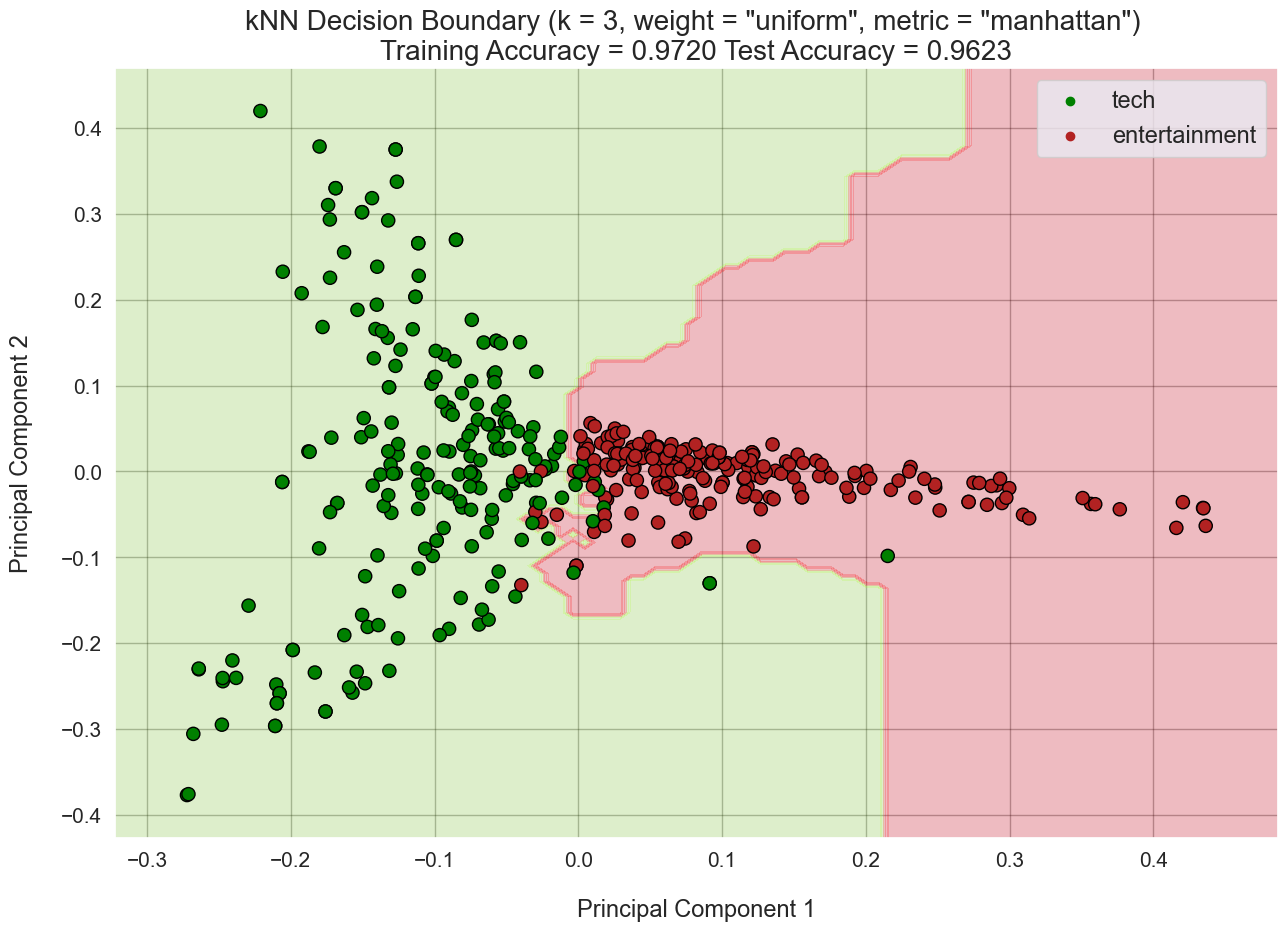

Training accuracy for kNN (Euclidean): 0.9626168224299065
Test accuracy for kNN (Euclidean): 0.9716981132075472
Training accuracy for kNN (Manhattan): 0.9579439252336449
Test accuracy for kNN (Manhattan): 0.9622641509433962


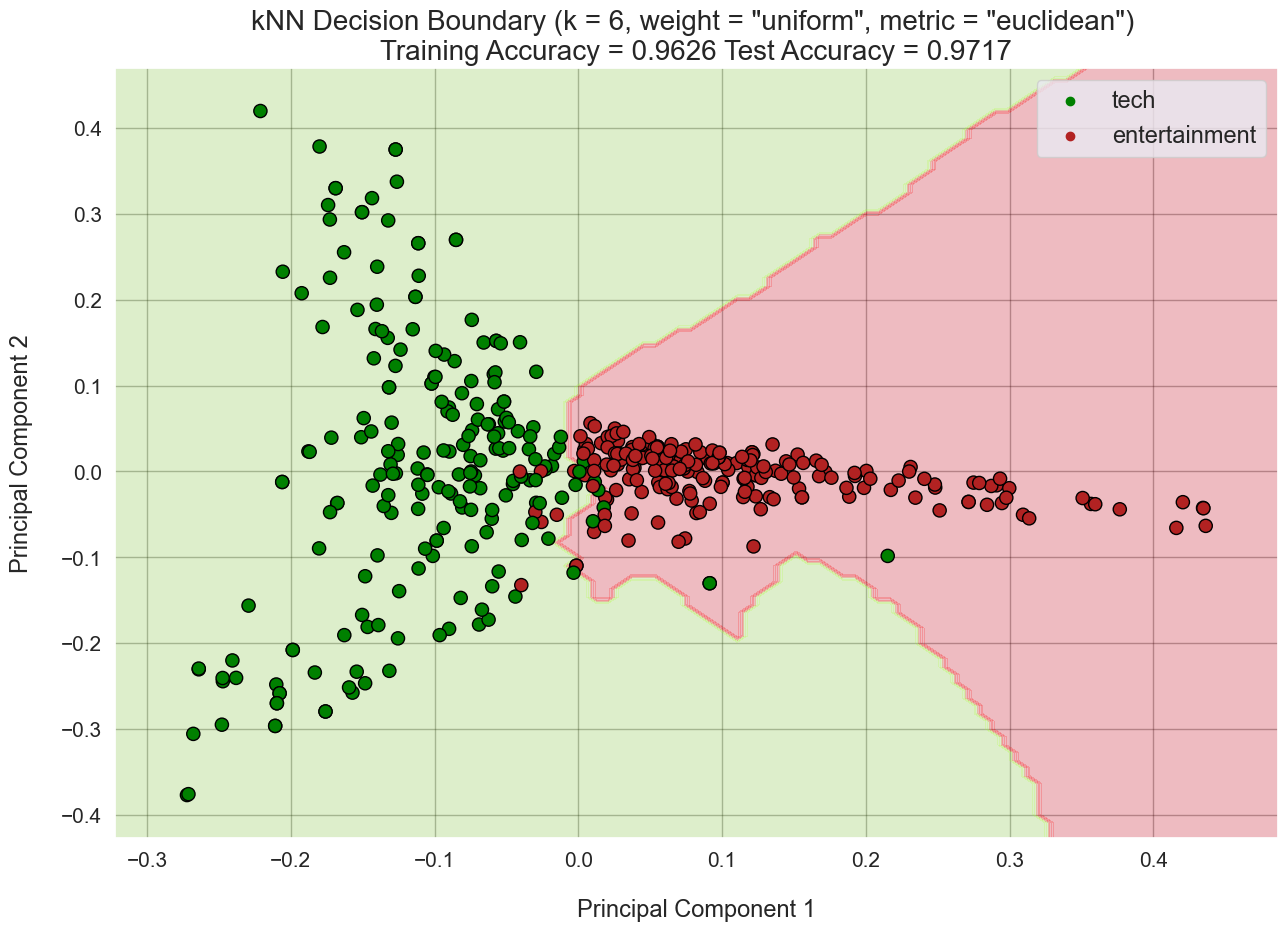

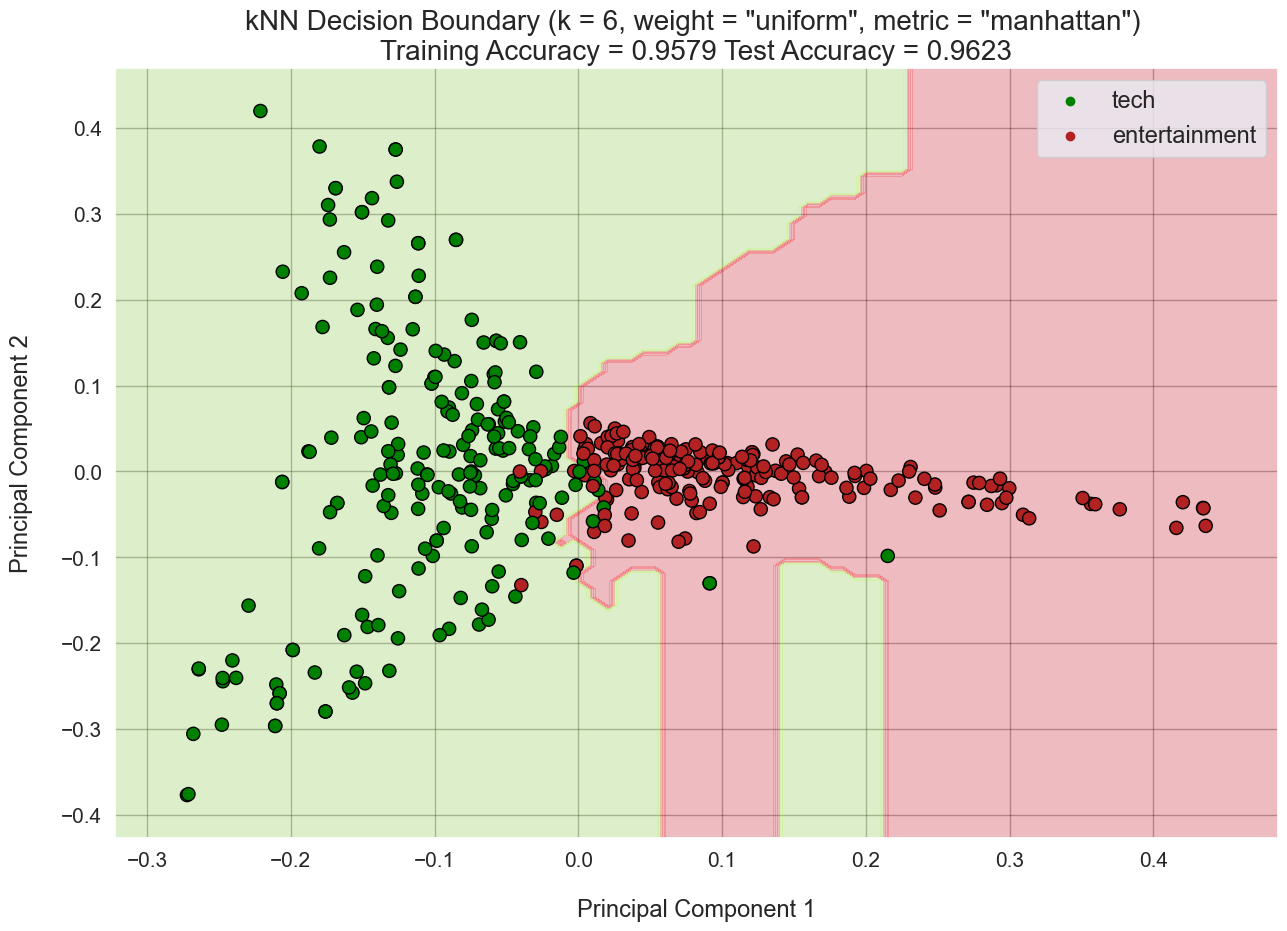

Training accuracy for kNN (Euclidean): 0.9602803738317757
Test accuracy for kNN (Euclidean): 0.9716981132075472
Training accuracy for kNN (Manhattan): 0.9626168224299065
Test accuracy for kNN (Manhattan): 0.9716981132075472


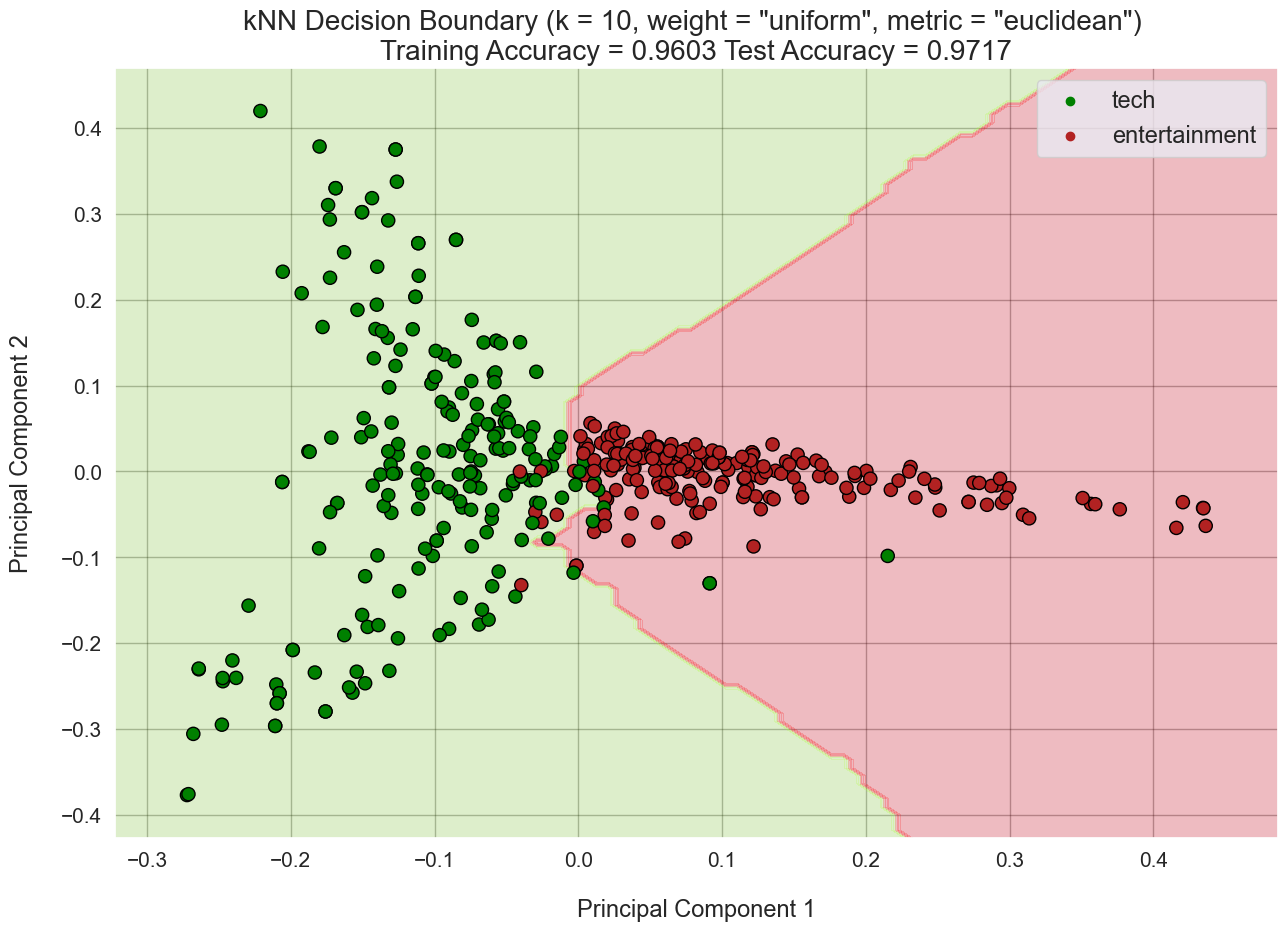

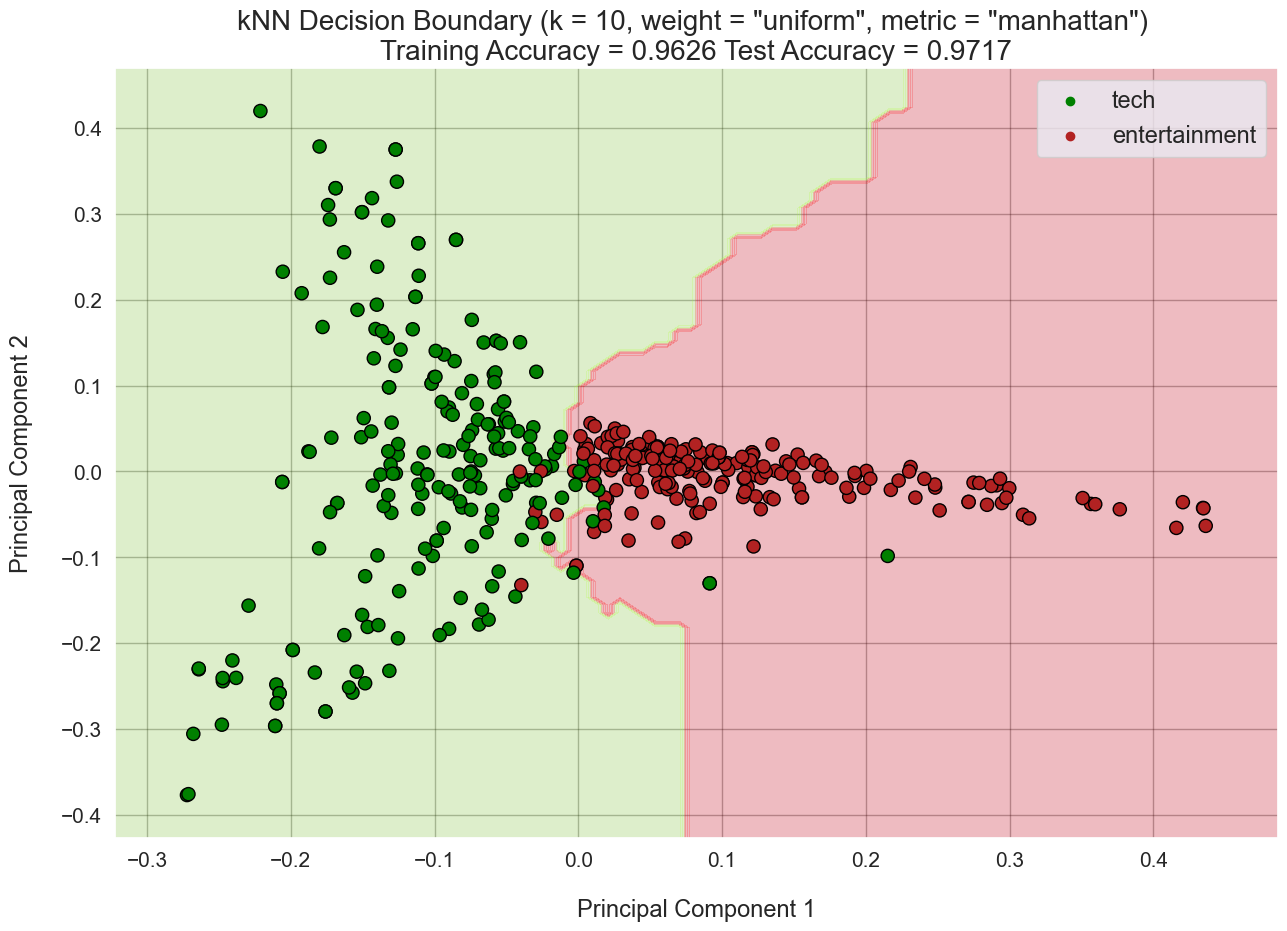

In [22]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

np.random.seed(1)

#kNN without weighting by distance and using euclidean distance (after applying PCA)
pca = PCA(n_components = 2, random_state = 1)
pca = pca.fit(prep_X_train)
pca_X_train = pd.DataFrame(pca.transform(prep_X_train), index = prep_X_train.index, columns = \
                           ['PC1', 'PC2'])

pca_X_test = pd.DataFrame(pca.transform(prep_X_test), index = prep_X_test.index, columns = \
                          ['PC1', 'PC2'])

n_neighbors = [1, 3, 6, 10]
#clfs = []
for k in n_neighbors:
    training_acc = []
    scores = []
    #kNN using the Euclidean distance metric
    knnC = knn(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    knnC.fit(pca_X_train, Y)
    
    training_acc.append(knnC.score(pca_X_train, Y))
    print('Training accuracy for kNN (Euclidean):', training_acc[0])
    
    preds = knnC.predict(pca_X_test)
    scores.append(knnC.score(pca_X_test, Y_test))
    print('Test accuracy for kNN (Euclidean):', scores[0])
    
    #kNN using the Manhattan distance metric
    knnC2 = knn(n_neighbors = k, weights = 'uniform', metric = 'manhattan')
    knnC2.fit(pca_X_train, Y)
    
    training_acc.append(knnC2.score(pca_X_train, Y))
    print('Training accuracy for kNN (Manhattan):', training_acc[1])

    preds2 = knnC2.predict(pca_X_test)
    scores.append(knnC2.score(pca_X_test, Y_test))
    print('Test accuracy for kNN (Manhattan):', scores[1])
    
    for i, clf in enumerate([knnC, knnC2]):
        #clfs.append(clf)
        #Plotting the decision boundaries
        plt.rcParams['figure.figsize'] = (15, 10)
        cmap_light = ListedColormap(['greenyellow', 'red'])
        _, ax = plt.subplots()
        DecisionBoundaryDisplay.from_estimator(clf, pca_X_train, response_method = 'predict', alpha = 0.2, \
                            cmap = cmap_light, ax = ax, eps = 0.05)
        knn_plot = sns.scatterplot(x = pca_X_train['PC1'], y = pca_X_train['PC2'], hue = Y, \
                            palette = ['green','firebrick'], edgecolor = 'black', s = 90, linewidth = 1)
        knn_plot.set_title('kNN Decision Boundary (k = {}, weight = "{}", metric = "{}") \
\nTraining Accuracy = {:.4f} Test Accuracy = {:.4f}' \
            .format(clf.n_neighbors, clf.weights, clf.metric, training_acc[i], scores[i]), fontsize = '20')
        plt.xlabel('Principal Component 1', fontsize = 17, labelpad = 20)
        plt.ylabel('Principal Component 2', fontsize = 17, labelpad = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        legend_names = {0: 'tech', 1: 'entertainment'}
        handles, _ = plt.gca().get_legend_handles_labels()
        plt.legend(handles, [legend_names.get(label, label) for label in np.unique(Y)], fontsize = '17')
        plt.grid(color = 'black', alpha = 0.3)
        plt.show()

The impact of k and the distance metric on the decision boundary

# Task 3) kNN

In [ ]:
from sklearn.model_selection import cross_val_score

average_cv_scores = []
n_neighbors = [1, 3, 6, 10, 12, 15, 18]
clfs = []
for k in n_neighbors:
    #kNN using the Euclidean distance metric
    knnC = knn(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    knnC.fit(pca_X_train, Y)
    clfs.append(knnC)
    
    #kNN using the Euclidean distance metric weighted by distance
    knnCd = knn(n_neighbors = k, weights = 'distance', metric = 'euclidean')
    knnCd.fit(pca_X_train, Y)
    clfs.append(knnCd)
    
    #kNN using the Manhattan distance metric
    knnC2 = knn(n_neighbors = k, weights = 'uniform', metric = 'manhattan')
    knnC2.fit(pca_X_train, Y)
    clfs.append(knnC2)
    
    #kNN using the Euclidean distance metric
    knnCd2 = knn(n_neighbors = k, weights = 'distance', metric = 'euclidean')
    knnCd2.fit(pca_X_train, Y)
    clfs.append(knnCd2)
    
for clf in clfs:
    cv_scores = cross_val_score(clf, prep_X_train, Y, cv = 5)
    average_cv_score = np.mean(cv_scores)
    average_cv_scores.append(average_cv_score)
    print('For k =', clf.n_neighbors, ', weights =', clf.weights, ', Distance metric =', clf.metric, \
          '\nCV accuracies =', cv_scores, '\nAverage CV accuracy =', average_cv_score, '\n')
best_cv_score = max(average_cv_scores)
index_best_cv_score = average_cv_scores.index(best_cv_score)
best_clf = clfs[index_best_cv_score]
#print('The best kNN model has k =', best_clf.n_neighbors, ', Distance metric =', best_clf.metric, \
      #'with an average cross-validation accuracy of', best_cv_score)
print('The best kNN model has (k = {}, weight = "{}", metric = "{}") with an average cross-validation accuracy of {:.4f}.' \
    .format(best_clf.n_neighbors, best_clf.weights, best_clf.metric, best_cv_score))

For k = 1 , weights = uniform , Distance metric = euclidean 
CV accuracies = [0.95348837 0.93023256 0.93023256 0.94117647 0.96470588] 
Average CV accuracy = 0.9439671682626539 

For k = 1 , weights = distance , Distance metric = euclidean 
CV accuracies = [0.95348837 0.93023256 0.93023256 0.94117647 0.96470588] 
Average CV accuracy = 0.9439671682626539 

For k = 1 , weights = uniform , Distance metric = manhattan 
CV accuracies = [0.87209302 0.90697674 0.84883721 0.90588235 0.95294118] 
Average CV accuracy = 0.8973461012311901 

For k = 1 , weights = distance , Distance metric = euclidean 
CV accuracies = [0.95348837 0.93023256 0.93023256 0.94117647 0.96470588] 
Average CV accuracy = 0.9439671682626539 

For k = 3 , weights = uniform , Distance metric = euclidean 
CV accuracies = [0.98837209 0.91860465 0.93023256 0.96470588 0.98823529] 
Average CV accuracy = 0.9580300957592339 

For k = 3 , weights = distance , Distance metric = euclidean 
CV accuracies = [0.98837209 0.91860465 0.93023